In [1]:
from pymonntorch import (
    Network, NeuronGroup, SynapseGroup, 
    EventRecorder, Recorder)
from neuralBehaviors import SetdtBehavior, LIFBehavior, InputBehavior
from synapseBehaviors import DeltaBehavior, ConductanceBehavior
from inputs import step_input
import matplotlib.pyplot as plt
import torch


1000xBatch: 1/1 (100%) 7456.794ms


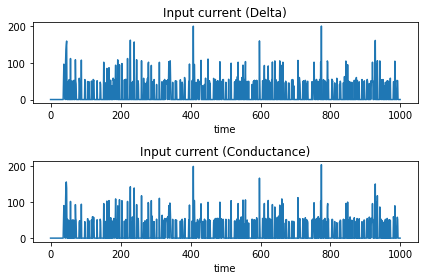

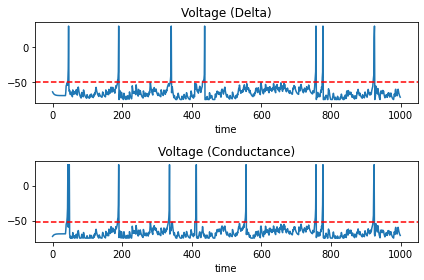

In [2]:
lif_params1 = {'tau_m': 5.0, 'a': -0.5, 'tau_w':  100, 'b':  20}
lif_params2 = {'tau_m': 5.0, 'a': -0.5, 'tau_w':  100, 'b':  20}
net = Network(behavior={1: SetdtBehavior()}, settings={'synapse_mode': 'SxD'})
ng1 = NeuronGroup(100, behavior={
    1: LIFBehavior(**lif_params1),
    2: InputBehavior(step_input, **{'interval0': 20, 'interval1': 5000, 'amp': 30}),
    9: Recorder(variables=['voltage', 'inp', 'w']),
    10: EventRecorder(variables=['spike'])
}, net=net, tag='pop1')

ng2 = NeuronGroup(1, behavior={
    1: LIFBehavior(**lif_params2),
    2: InputBehavior(),
    9: Recorder(variables=['voltage', 'inp', 'w']),
    10: EventRecorder(variables=['spike'])
}, net=net, tag='pop2')

ng3 = NeuronGroup(1, behavior={
    1: LIFBehavior(**lif_params2),
    2: InputBehavior(),
    9: Recorder(variables=['voltage', 'inp', 'w']),
    10: EventRecorder(variables=['spike'])
}, net=net, tag='pop3')

syn12 = SynapseGroup(ng1, ng2, net, 'exc', {3:DeltaBehavior(w_mean=50)})
syn13 = SynapseGroup(ng1, ng3, net, 'exc', {3:ConductanceBehavior(w_mean=50, tau=100), 9:Recorder(variables=['g'])})

net.initialize(info=False)
net.simulate_iterations(1000)

fig, ax = plt.subplots(2, 1)
ax[0].plot(ng2['inp', 0])
ax[0].set_title("Input current (Delta)")
ax[0].set_xlabel('time')
ax[1].plot(ng3['inp', 0])
ax[1].set_title("Input current (Conductance)")
ax[1].set_xlabel('time')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(2, 1)
ax[0].plot(ng2['voltage', 0])
ax[0].set_title("Voltage (Delta)")
ax[0].set_xlabel('time')
ax[0].axhline(ng2.Uthresh.mean(), color='r', linestyle='--')
ax[1].plot(ng3['voltage', 0])
ax[1].set_title("Voltage (Conductance)")
ax[1].set_xlabel('time')
ax[1].axhline(ng3.Uthresh.mean(), color='r', linestyle='--')
plt.tight_layout()
plt.show()

# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax[0].plot(syn12['g', 0])
# ax[0].set_title('Simple Spikes')
# ax[1].plot(syn13['g', 0])
# ax[1].set_title('Spikes with Conductance')
# plt.tight_layout()
# plt.show()



simulating full
simulating fix_prob
simulating fix_count
simulating full
simulating fix_prob
simulating fix_count


C:\Users\Elham moin\AppData\Local\Temp\ipykernel_8764\444243822.py:92: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


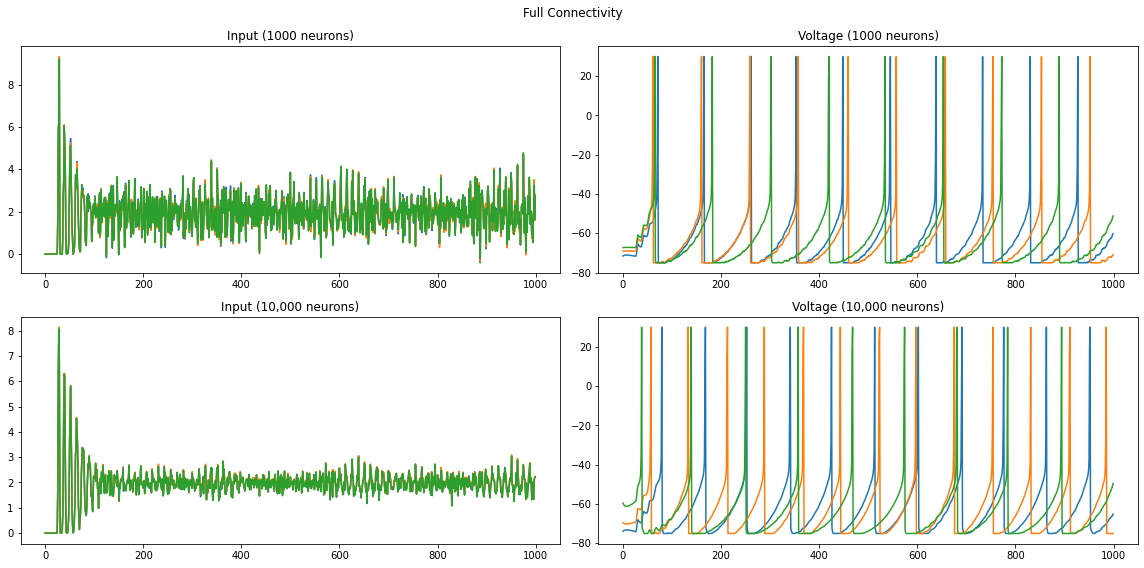

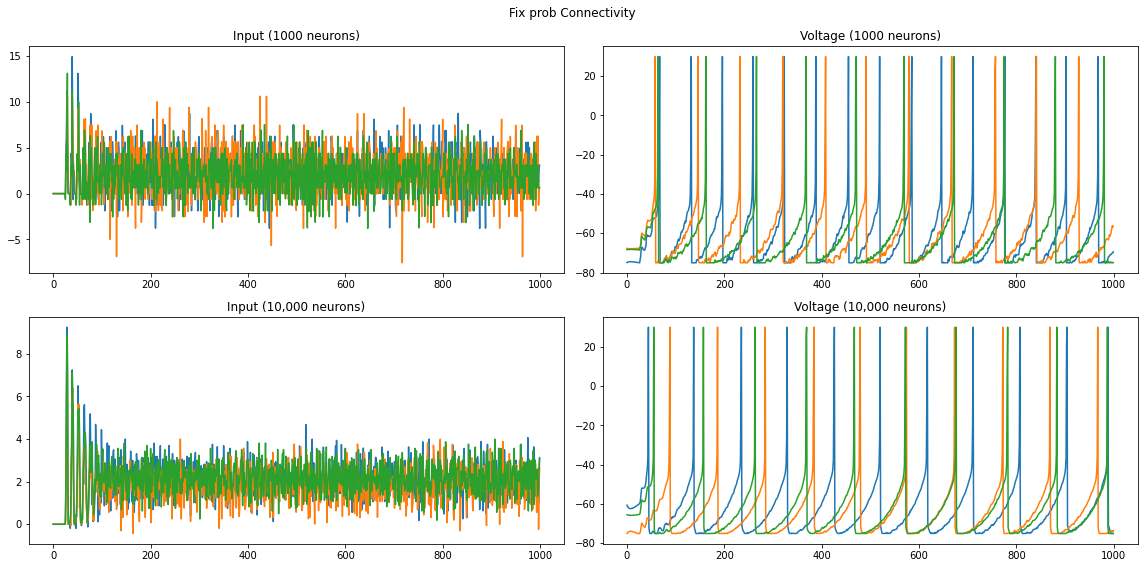

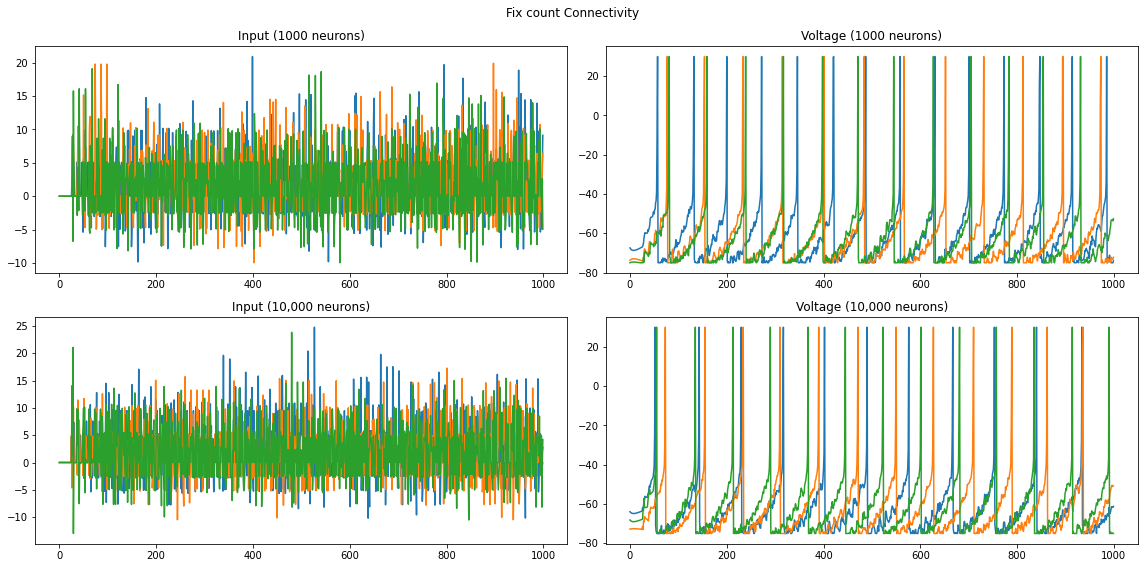

In [3]:
lif_params1 = {'tau_m': 10, 'a': -0.5, 'tau_w':  10, 'b':  20, 'R': 3, }
lif_params2 = {'tau_m': 10, 'a': -0.5, 'tau_w':  10, 'b':  20, 'R': 3, }

subplots = {connection_type: plt.subplots(2, 2, figsize=(16, 8)) for connection_type in ['full', 'fix_prob', 'fix_count']}

# 1000 neurons
for connection_type in ['full', 'fix_prob', 'fix_count']:
    print(f"simulating {connection_type}")
    net = Network(behavior={1: SetdtBehavior()}, settings={'synapse_mode': 'SxD'})
    ng1 = NeuronGroup(800, behavior={
        1: LIFBehavior(**lif_params1),
        2: InputBehavior(step_input, **{'interval0': 20, 'interval1': 5000, 'amp': 20}),
        9: Recorder(variables=[]),
        10: EventRecorder(variables=[])
    }, net=net, tag='pop1')

    ng2 = NeuronGroup(200, behavior={
        1: LIFBehavior(**lif_params1),
        2: InputBehavior(step_input, **{'interval0': 20, 'interval1': 5000, 'amp': 20}),
        9: Recorder(variables=[]),
        10: EventRecorder(variables=[])
    }, net=net, tag='pop2')

    ng3 = NeuronGroup(3, behavior={
        1: LIFBehavior(**lif_params2),
        2: InputBehavior(),
        9: Recorder(variables=['voltage', 'inp']),
        10: EventRecorder(variables=['spike'])
    }, net=net, tag='pop3')

    syn13 = SynapseGroup(ng1, ng3, net, 'exc', {3:DeltaBehavior(con_mode=connection_type, rescale=True)})
    syn23 = SynapseGroup(ng2, ng3, net, 'inh', {3:DeltaBehavior(con_mode=connection_type, rescale=True)})
    

    net.initialize(info=False)
    net.simulate_iterations(1000, measure_block_time=False)

    fig, ax = subplots[connection_type]
    # print(f"Figures of {connection_type} with {syn13.W.count_nonzero(0)} exc and {syn23.W.count_nonzero(0)} inh pre-synaptic neurons:")
    ax[0, 0].plot(ng3['inp', 0])
    ax[0, 0].set_title('Input (1000 neurons)')
    ax[0, 1].plot(ng3['voltage', 0])
    ax[0, 1].set_title('Voltage (1000 neurons)')
    fig.tight_layout()
    fig.suptitle(connection_type.replace('_', ' ').capitalize() + " Connectivity")

    
# 10,000 neurons
for connection_type in ['full', 'fix_prob', 'fix_count']:
    print(f"simulating {connection_type}")
    net = Network(behavior={1: SetdtBehavior()}, settings={'synapse_mode': 'SxD'})
    ng1 = NeuronGroup(8000, behavior={
        1: LIFBehavior(**lif_params1),
        2: InputBehavior(step_input, **{'interval0': 20, 'interval1': 5000, 'amp': 20}),
        9: Recorder(variables=[]),
        10: EventRecorder(variables=[])
    }, net=net, tag='pop1')

    ng2 = NeuronGroup(2000, behavior={
        1: LIFBehavior(**lif_params1),
        2: InputBehavior(step_input, **{'interval0': 20, 'interval1': 5000, 'amp': 20}),
        9: Recorder(variables=[]),
        10: EventRecorder(variables=[])
    }, net=net, tag='pop2')

    ng3 = NeuronGroup(3, behavior={
        1: LIFBehavior(**lif_params2),
        2: InputBehavior(),
        9: Recorder(variables=['voltage', 'inp']),
        10: EventRecorder(variables=['spike'])
    }, net=net, tag='pop3')

    syn13 = SynapseGroup(ng1, ng3, net, 'exc', {3:DeltaBehavior(con_mode=connection_type, rescale=True)})
    syn23 = SynapseGroup(ng2, ng3, net, 'inh', {3:DeltaBehavior(con_mode=connection_type, rescale=True)})
    

    net.initialize(info=False)
    net.simulate_iterations(1000, measure_block_time=False)

    fig, ax = subplots[connection_type]
    # print(f"Figures of {connection_type} with {syn13.W.count_nonzero(0)} exc and {syn23.W.count_nonzero(0)} inh pre-synaptic neurons:")
    ax[1, 0].plot(ng3['inp', 0])
    ax[1, 0].set_title('Input (10,000 neurons)')
    ax[1, 1].plot(ng3['voltage', 0])
    ax[1, 1].set_title('Voltage (10,000 neurons)')
    fig.tight_layout()
    fig.suptitle(connection_type.replace('_', ' ').capitalize() + " Connectivity")


for connection_type in ['full', 'fix_prob', 'fix_count']:
    fig, ax = subplots[connection_type]
    fig.show()


Network['Network'](Neurons: tensor(1000)|2 groups, Synapses: tensor(320000)|2 groups){1:SetdtBehavior()}
NeuronGroup['pop_exc', 'NeuronGroup', 'ng'](800){1:LIFBehavior(func=exp,adaptive=True,Urest=-70,Uthresh=-50,Ureset=-75,Upeak=30.0,R=3,tau_m=10,Tref=0,a=-0.5,b=20,tau_w=10,variation=0.2,func_kwargs={},)2:InputBehavior(func=<function step_input at 0x000002CD36580CA0>,func_args={'interval0': 20, 'interval1': 5000, 'amp': 10},)9:Recorder(variables=['inp', 'voltage'],gap_width=0,max_length=None,auto_annotate=True,tag=None,)10:EventRecorder(variables=['spike'],gap_width=0,max_length=None,auto_annotate=True,tag=None,)}
NeuronGroup['pop_inh', 'NeuronGroup', 'ng'](200){1:LIFBehavior(func=exp,adaptive=True,Urest=-70,Uthresh=-50,Ureset=-75,Upeak=30.0,R=3,tau_m=10,Tref=0,a=-0.5,b=20,tau_w=10,variation=0.2,func_kwargs={},)2:InputBehavior(func=<function step_input at 0x000002CD36580CA0>,func_args={'interval0': 20, 'interval1': 5000, 'amp': 10},)9:Recorder(variables=['inp', 'voltage'],gap_width=0,

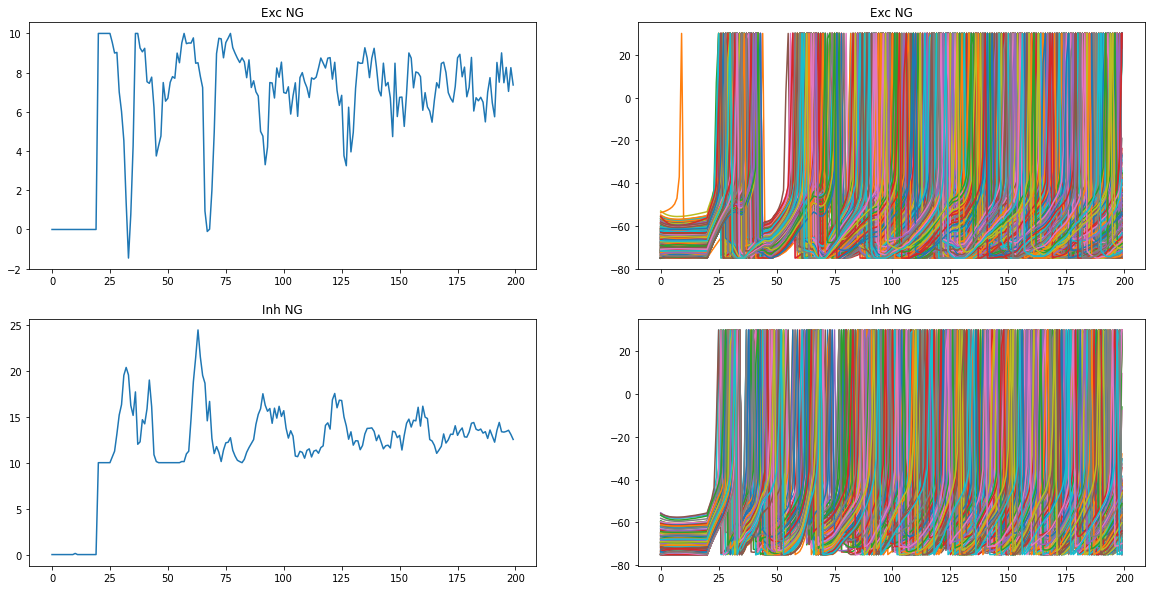

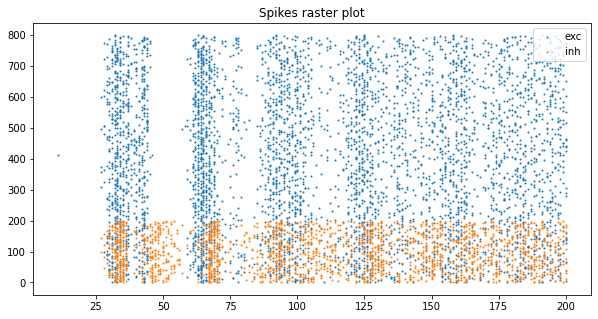

In [3]:
from experiments import exc_and_inh
import matplotlib.pyplot as plt

history = exc_and_inh()
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0, 0].plot(history['exc']['inp'][:, 0])
ax[0, 0].set_title("Exc NG")
ax[1, 0].plot(history['inh']['inp'][:, 0])
ax[1, 0].set_title("Inh NG")

# fig, ax = plt.subplots(2, 1, figsize=(8, 16))
ax[0, 1].plot(history['exc']['vol'])
ax[0, 1].set_title("Exc NG")
ax[1, 1].plot(history['inh']['vol'])
ax[1, 1].set_title("Inh NG")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sexc = history['exc']['spike']
sinh = history['inh']['spike']
sexc_plot = ax.scatter(sexc[:, 0], sexc[: ,1], s=1,)
sinh_plot = ax.scatter(sinh[:, 0], sinh[: ,1], s=1,)
plt.legend([sexc_plot, sinh_plot], ['exc', 'inh'], loc='upper right', fontsize=10)
ax.set_title("Spikes raster plot")
plt.show()

# fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# exc_activity = torch.tensor([len(sexc[sexc[:, 0] == i]) for i in range(net.iteration)])
# inh_activity = torch.tensor([len(sinh[sinh[:, 0] == i]) for i in range(net.iteration)])
# ax.plot(exc_activity)
# ax.plot(inh_activity)
# ax.plot(exc_activity + inh_activity)
# ax.legend(['exc', 'inh', 'total'])
# ax.set_title("Population Activity")
# plt.show()



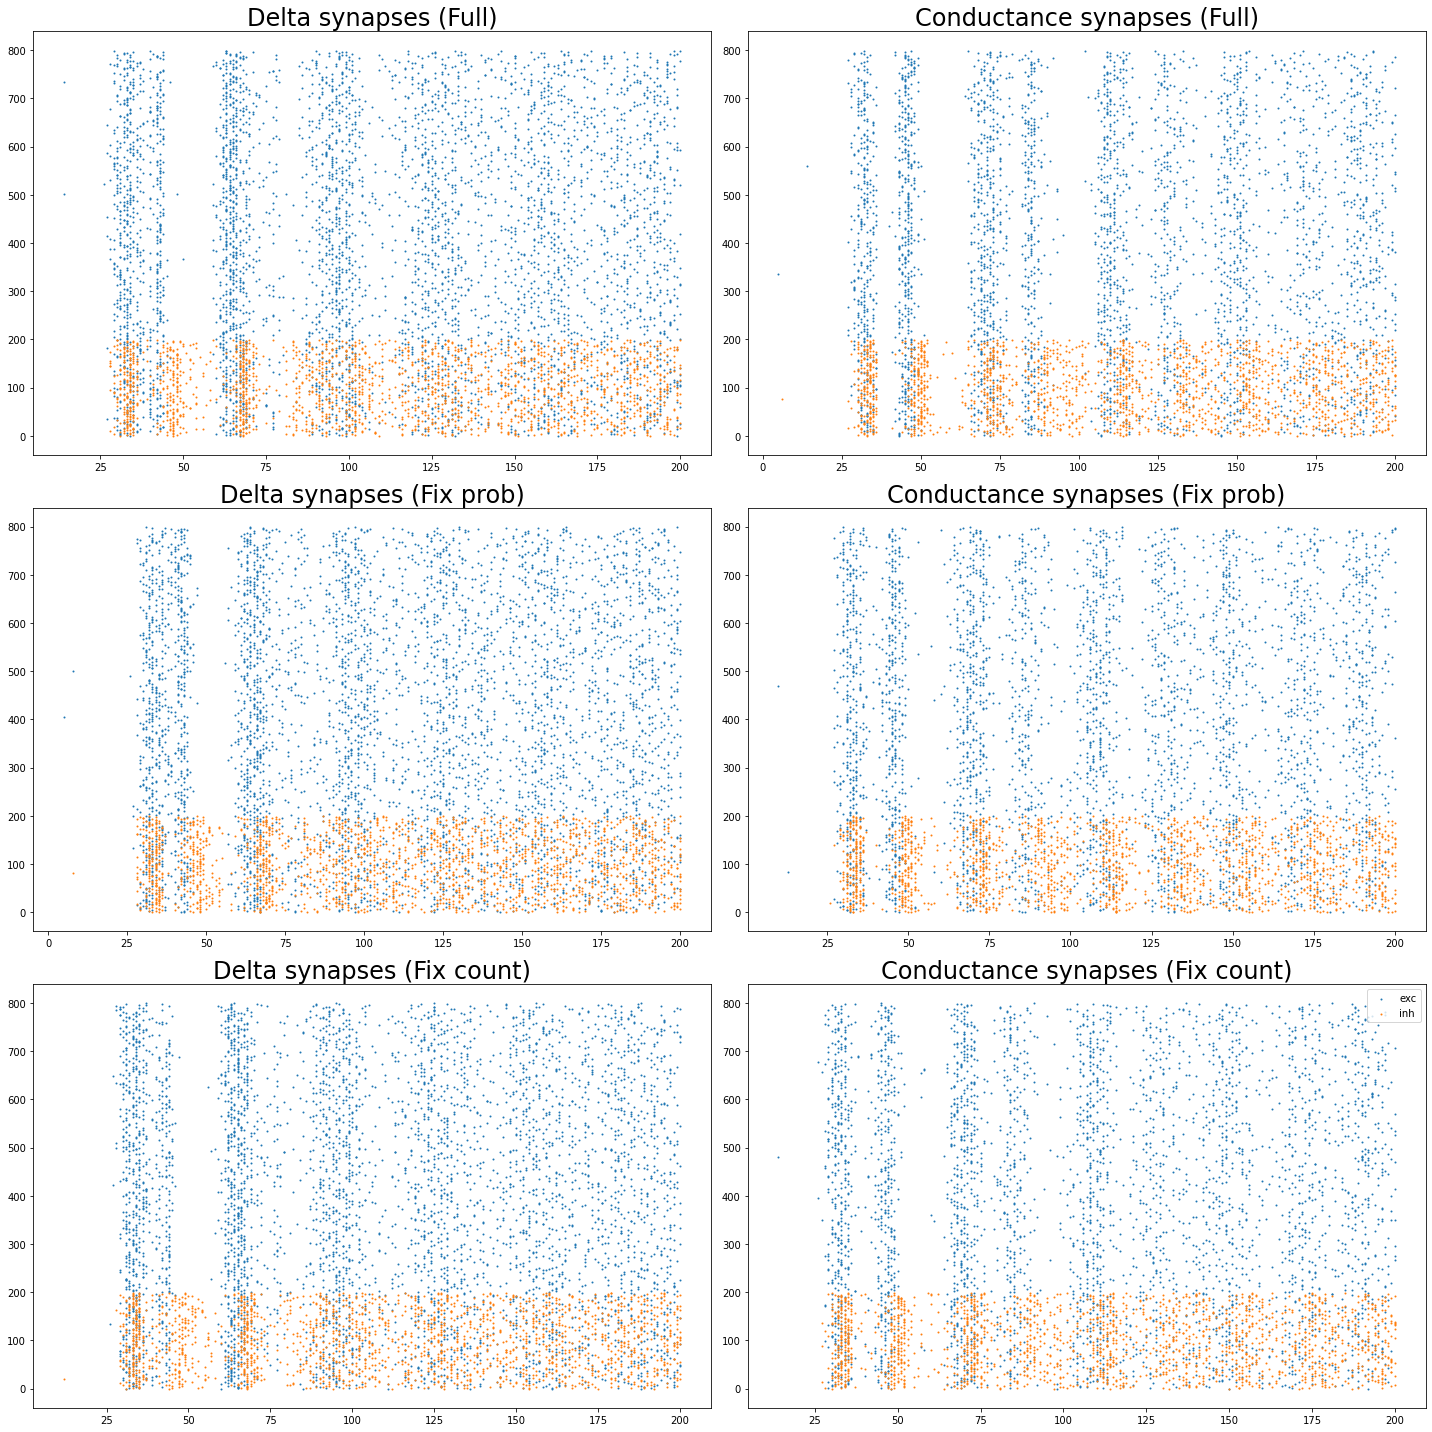

In [11]:
from synapseBehaviors import DeltaBehavior, ConductanceBehavior
from experiments import exc_and_inh
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 2, figsize=(20, 20))

for i, con_mode in enumerate(['full', 'fix_prob', 'fix_count']):
    for j, syn in enumerate([DeltaBehavior, ConductanceBehavior]):
        history = exc_and_inh(con_mode=con_mode, synBehavior=syn)
        sexc = history['exc']['spike']
        sinh = history['inh']['spike']
        sexc_plot = ax[i, j].scatter(sexc[:, 0], sexc[: ,1], s=1,)
        sinh_plot = ax[i, j].scatter(sinh[:, 0], sinh[: ,1], s=1,)
        plt.legend([sexc_plot, sinh_plot], ['exc', 'inh'], loc='upper right', fontsize=10)
        ax[i, j].set_title(f"{syn.__name__[:-8]} synapses ({con_mode.replace('_', ' ').capitalize()})", fontsize=24)

fig.tight_layout()
plt.show()


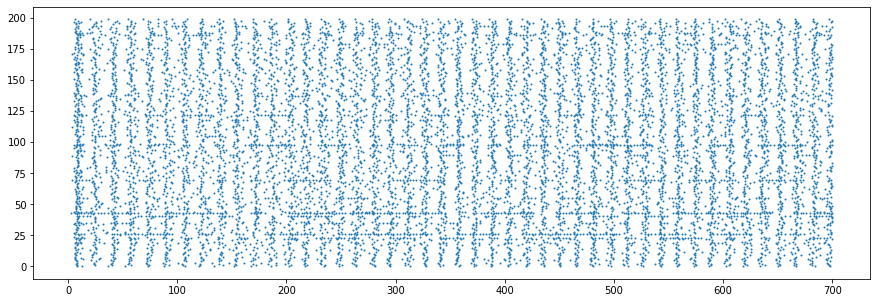

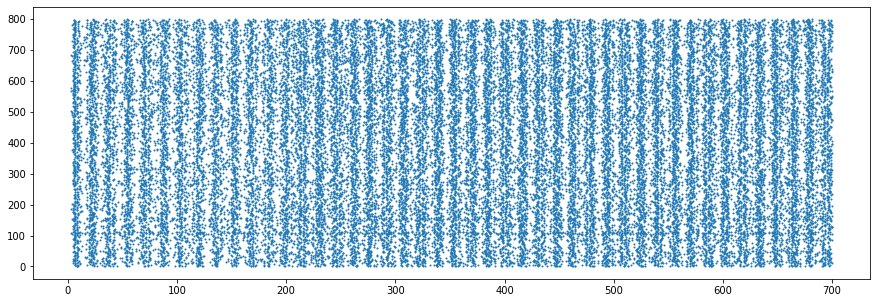

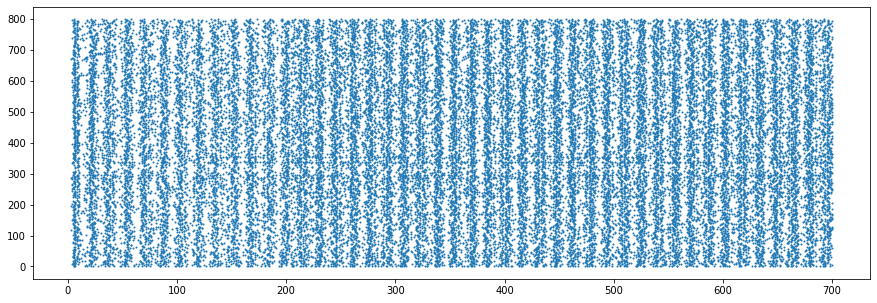

In [5]:
from experiments import decision_making
import matplotlib.pyplot as plt


history = decision_making(w_mean_exc=100, w_mean_inh=200, neurons_var=.4, input_var=50, amp=5)


import matplotlib.pyplot as plt

for banana in history['spike']:
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.scatter(banana[:, 0], banana[: ,1], s=1, )

    plt.show()

    